## Task 2. Assume that you are counting cells in a particular square on a Petri dish (see the picture, there are 4 cells in the highlighted square in this example).
**(a) Write a function, that simulates a random variable "number of cells in a particular square $[(0.3,0.5),(0.4,0.6)]$ ".**

**(b) The result is Poisson distribution $\operatorname{Poiss}(\lambda)$. Find the MLE of $\lambda$.**

As it was calculated during the lecture the MLE for Poisson distribution is samply its average. Here are the equations which lead to it:

$\begin{gathered}
\ln \mathscr{L}(y ; \lambda)=\sum_1^n \ln P\left(\xi=y_i\right)=\sum_1^n \ln \left(\frac{\lambda^{y_i}}{y_{i} !} e^{-\lambda}\right)= \\
\left.=\sum_1^n\left(y_i \ln \lambda-\ln y_{i} !-\lambda\right)\right) \\
\ln \mathscr{L}_\lambda^{\prime}(y ; \lambda)=\sum_1^n\left(\frac{1}{\lambda} y_i-1\right)=0 \\
\sum_1^n\left(\frac{1}{\lambda} y_i-1\right)=\frac{1}{\lambda} \sum_1^n y_i-n=0 \\
\lambda=\frac{1}{n} \sum_1^n y_i-\text { in this example MLE is sample mean. }
\end{gathered}$

In [17]:
import math
import random
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [6]:
def generate_random_point_in_circle(centre=(0.0, 0.0), radius=1.0):
    angle = 2 * math.pi * random.random()
    cur_radius = radius * math.sqrt(random.random())
    x = cur_radius * math.cos(angle) + centre[0]
    y = cur_radius * math.sin(angle) + centre[1]
    return x, y

def generate_count_of_points_in_square(from_point=(0.3, 0.5), to_point=(0.4, 0.6), n=1000):
    sample = [generate_random_point_in_circle() for _ in range(n)]
    sample = [x for x in sample if from_point[0] <= x[0] <= to_point[0] and from_point[1] <= x[1] <= to_point[1]]
    return len(sample)

In [13]:
poisson_sample = [generate_count_of_points_in_square() for _ in range(1000)]
mle = sum(poisson_sample) / len(poisson_sample)

In [14]:
scipy_sample = poisson.rvs(mle, size=1000)

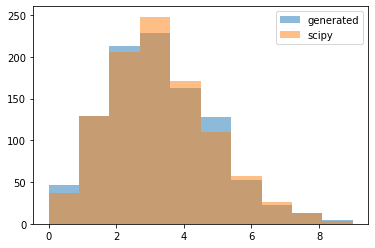

In [16]:
plt.hist(poisson_sample, alpha=0.5, label='generated')
plt.hist(scipy_sample, alpha=0.5, label='scipy')
plt.legend()